In [35]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [36]:
from torch import nn
from torch import optim
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 128)
        self.hidden3 = nn.Linear(128, 64)
        self.outputs = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1) # --> inputs data must be flatten 1x28x18 --> samples x 784
        
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = F.log_softmax(self.outputs(x), dim=1)
        
        return x

In [37]:
model = Network()
criterion = nn.NLLLoss() # Negative Log-Likelihood Loss --> L(y) = -log(y)
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()   # Clear off the gradient (w = w - gradient)
        
        log_ps = model(images)  # People use --> outputs = model(inputs)
        loss = criterion(log_ps, labels) 
        loss.backward()                  # Backpropagation 
        optimizer.step()                 # Update the weights
        
        running_loss += loss.item()      # Accumulate the loss
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))


Epoch: 1/30..  Training Loss: 0.512..  Test Loss: 0.437..  Test Accuracy: 0.843
Epoch: 2/30..  Training Loss: 0.390..  Test Loss: 0.409..  Test Accuracy: 0.853
Epoch: 3/30..  Training Loss: 0.354..  Test Loss: 0.400..  Test Accuracy: 0.856
Epoch: 4/30..  Training Loss: 0.332..  Test Loss: 0.391..  Test Accuracy: 0.863
Epoch: 5/30..  Training Loss: 0.315..  Test Loss: 0.370..  Test Accuracy: 0.871
Epoch: 6/30..  Training Loss: 0.300..  Test Loss: 0.373..  Test Accuracy: 0.874
Epoch: 7/30..  Training Loss: 0.291..  Test Loss: 0.389..  Test Accuracy: 0.868
Epoch: 8/30..  Training Loss: 0.281..  Test Loss: 0.359..  Test Accuracy: 0.878
Epoch: 9/30..  Training Loss: 0.272..  Test Loss: 0.367..  Test Accuracy: 0.876
Epoch: 10/30..  Training Loss: 0.264..  Test Loss: 0.374..  Test Accuracy: 0.875
Epoch: 11/30..  Training Loss: 0.258..  Test Loss: 0.363..  Test Accuracy: 0.880
Epoch: 12/30..  Training Loss: 0.250..  Test Loss: 0.359..  Test Accuracy: 0.879
Epoch: 13/30..  Training Loss: 0.243.

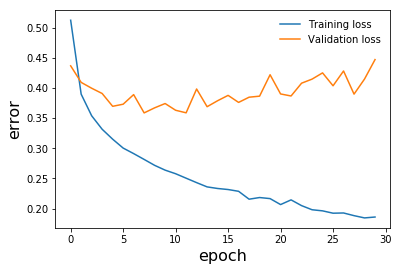

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.xlabel('epoch', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.legend(frameon=False)

In [56]:
train_losses

[0.5124625033184663,
 0.3897924520599563,
 0.35394485353597444,
 0.33155598702715405,
 0.3151066795722254,
 0.3003400652758729,
 0.29116427983397614,
 0.2814891630612901,
 0.27167195941943095,
 0.2637136698658787,
 0.2577536178033934,
 0.2503469003034807,
 0.2429764848718765,
 0.23591342765385154,
 0.23326661295172121,
 0.2315298139310277,
 0.22858724355109847,
 0.21549444752874405,
 0.2182465375446752,
 0.21647062019578048,
 0.20657068186763253,
 0.2143550709819298,
 0.20482079293737723,
 0.19798424556406577,
 0.19614580645362958,
 0.19225598450329132,
 0.19262359759160705,
 0.18817780060030376,
 0.18442394350494531,
 0.18590815298990018]